In this doc, a simulated eda data will be created and will be analyzed using nk pacakge

- Things will be used:
nk.eda_simulate(duration, scr_number, drift, noise) to simulate eda data
nk.eda_process(eda_signal, sampling_rate) to process eda data
nk.events_plot(features, cleaned_eda, color=['red', 'blue', 'orange']) to get scr or sking conductanc response  which include 1) peak onsets, 2) peak amplitude, and 3) half-recovery time.


Some importnat concepts about EDA data (ref: E4):

Skin conductance measurement is traditionally characterized into two types – tonic skin conductance level and phasic skin conductance response – which can roughly be thought of as “the smooth underlying slowly-changing levels” vs. “the rapidly changing peaks.”
Phasic – Phasic skin conductance measurements are typically associated with short-term events and occur in the presence of discrete environmental stimuli - sight, sound, smell, cognitive processes that precede an event such as anticipation, decision making, etc. Phasic changes usually show up as abrupt increases in the skin conductance, or “peaks” in the skin conductance. These peaks are generally referred to as Skin Conductance Responses (SCRs).

So, in nutshell, phasic data represents rapid changes in data and tonic shows slow changes (trend) in the data

phasic: Skin Conductance Responses (SCRs): are abrupt increases in the conductance of the skin. 
tonic:  Skin Conductance Level (SCL): The SCL usually refers to the raw level of conductance of the skin.It may also be computed as an average over longer intervals, typically ranging from tens of seconds to tens of minutes. 


In [8]:
# load packages
import neurokit2 as nk
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [10]:
# simulated data
eda_signal = nk.eda_simulate(duration=10, sampling_rate=250, scr_number=3, drift=0.01)
pd.DataFrame(eda_signal).head()

,0
0,0.997566
1,0.997612
2,0.997668
3,0.997733
4,0.997808


In [11]:
# Once you have a raw EDA signal in the shape of a vector (i.e., a one-dimensional array), 
# or a list, you can use eda_process() to process it.
# nk.eda_process extract all of usefull data from raw data such as eda_tonic, phasic, peaks,...

signals, info = nk.eda_process(eda_signal, sampling_rate=250)
signals.head()

,EDA_Raw,EDA_Clean,EDA_Tonic,EDA_Phasic,SCR_Onsets,SCR_Peaks,SCR_Height,SCR_Amplitude,SCR_RiseTime,SCR_Recovery,SCR_RecoveryTime
0,0.997566,1.006233,1.173993,-0.199446,0,0,0.0,0.0,0.0,0,0.0
1,0.997612,1.006601,1.174146,-0.199261,0,0,0.0,0.0,0.0,0,0.0
2,0.997668,1.006934,1.174299,-0.199112,0,0,0.0,0.0,0.0,0,0.0
3,0.997733,1.007228,1.174452,-0.199001,0,0,0.0,0.0,0.0,0,0.0
4,0.997808,1.007480,1.174605,-0.198932,0,0,0.0,0.0,0.0,0,0.0


In [12]:
info

{'SCR_Onsets': array([  48, 1105, 1777], dtype=int64),
 'SCR_Peaks': array([ 138, 1196, 1867], dtype=int64),
 'SCR_Height': array([0.75445143, 0.6919226 , 0.78862394]),
 'SCR_Amplitude': array([0.99557516, 1.00918491, 1.01421245]),
 'SCR_RiseTime': array([0.36 , 0.364, 0.36 ]),
 'SCR_Recovery': array([ 265., 1319., 1996.]),
 'SCR_RecoveryTime': array([0.508, 0.492, 0.516])}

Locate Skin Conductance Response (SCR) features
The processing function does two important things for our purpose: Firstly, it cleans the signal. Secondly, it detects the location of 1) peak onsets, 2) peak amplitude, and 3) half-recovery time. Let’s extract these from the output.

In [13]:
# Extract clean EDA and SCR features
cleaned = signals["EDA_Clean"]
features = [info["SCR_Onsets"], info["SCR_Peaks"], info["SCR_Recovery"]]


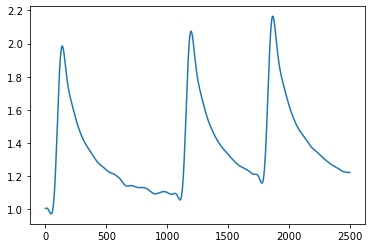

In [17]:
#let see how cleaned data is different than raw data
plt.plot(cleaned)

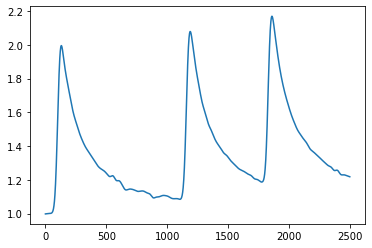

In [18]:
plt.plot(signals["EDA_Raw"])

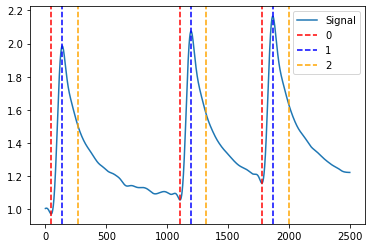

In [20]:
## Visualize SCR features in cleaned EDA signal
plot = nk.events_plot(features, cleaned, color=['red', 'blue', 'orange'])

# We can now visualize the location of the peak onsets, the peak amplitude, 
# as well as the half-recovery time points in the cleaned EDA signal, respectively
# marked by the red dashed line, blue dashed line, and orange dashed line.

Decompose EDA into Phasic and Tonic components
We can also decompose the EDA signal into its phasic and tonic components, or more specifically, the Phasic Skin Conductance Response (SCR) and the Tonic Skin Conductance Level (SCL) respectively. The SCR represents the stimulus-dependent fast changing signal whereas the SCL is slow-changing and continuous. Separating these two signals helps to provide a more accurate estimation of the true SCR amplitude.

In [23]:
data_phasic_tonic = nk.eda_phasic(nk.standardize(eda_signal), sampling_rate=250)
# please note that sampling rate should be exactly based on recording sampling rate
# please note that we standardize the data to mitigate the effect of inter-idividual variablities
data_phasic_tonic.head()

,EDA_Tonic,EDA_Phasic
0,-0.758078,-0.765499
1,-0.757496,-0.766029
2,-0.756913,-0.766519
3,-0.756331,-0.766974
4,-0.755749,-0.767396


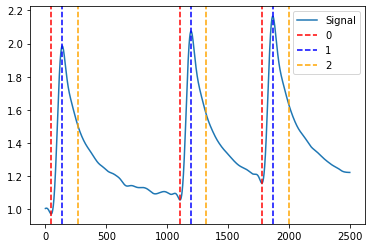

In [20]:
## Visualize SCR features in cleaned EDA signal
plot = nk.events_plot(features, cleaned, color=['red', 'blue', 'orange'])

# We can now visualize the location of the peak onsets, the peak amplitude, 
# as well as the half-recovery time points in the cleaned EDA signal, respectively
# marked by the red dashed line, blue dashed line, and orange dashed line.

Decompose EDA into Phasic and Tonic components
We can also decompose the EDA signal into its phasic and tonic components, or more specifically, the Phasic Skin Conductance Response (SCR) and the Tonic Skin Conductance Level (SCL) respectively. The SCR represents the stimulus-dependent fast changing signal whereas the SCL is slow-changing and continuous. Separating these two signals helps to provide a more accurate estimation of the true SCR amplitude.



In [24]:
data_phasic_tonic = nk.eda_phasic(nk.standardize(eda_signal), sampling_rate=250)
# we standardize raw data to mitigate the effect of inter-individual variablities
# note that sampling rate must be exactly based on recording sampling rate
data_phasic_tonic.head()

,EDA_Tonic,EDA_Phasic
0,-0.758078,-0.765499
1,-0.757496,-0.766029
2,-0.756913,-0.766519
3,-0.756331,-0.766974
4,-0.755749,-0.767396


<AxesSubplot:>

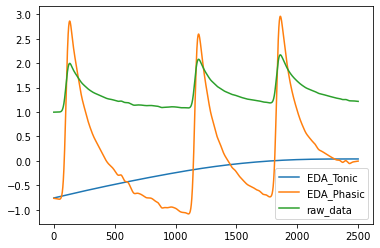

In [26]:
# now let add raw data as well to visulize all three phasic tonic and raw
data_phasic_tonic['raw_data']= eda_signal
data_phasic_tonic.plot() # or plt.plot(data_phasic_tonic)

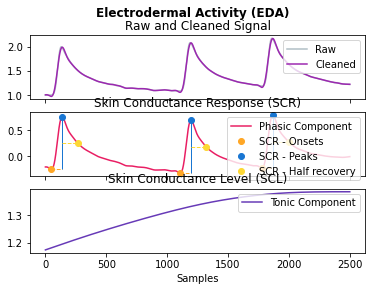

In [28]:
# Quick Plot
# You can obtain all of these features by using the eda_plot() function on the dataframe of processed EDA.
plot = nk.eda_plot(signals)
